# Компьютерные игры

## Описание проекта

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию:
* «E» («Everyone») — «Для всех»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «RP» («Rating Pending») - «Рейтинг ожидается»
* «AO» («Adults Only 18+») — «Только для взрослых»

## 1. Знакомимся с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

pd.set_option('display.max_columns', 500)

In [2]:
# Считываем данные
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16612,Bakumatsu Rock: Ultra Soul,PSP,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5053,Dance Dance Revolution Ultramix 3,XB,2005.0,Simulation,0.28,0.08,0.00,0.01,75.0,8.6,E10+
13312,Detective Conan: Marionette Symphony,3DS,2013.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16406,The Chronicles of Riddick: Assault on Dark Athena,PC,2009.0,Shooter,0.00,0.01,0.00,0.00,80.0,8,M
5550,Nicktoons: Movin',PS2,2004.0,Action,0.16,0.12,0.00,0.04,NaN,tbd,E
5931,Scooby-Doo! Night of 100 Frights,GC,2002.0,Platform,0.23,0.06,0.00,0.01,NaN,NaN,NaN
10507,Samurai Warriors Chronicles 2nd,3DS,2012.0,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN
2100,Fallout 3,PC,2008.0,Role-Playing,0.02,0.88,0.00,0.08,91.0,7.9,M
12798,Zendoku,DS,2007.0,Puzzle,0.05,0.00,0.00,0.00,68.0,tbd,E
14949,D.C. III: Da Capo III,PSP,2013.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## 1. Вывод

В нашем распоряжении 16715 строк с данными о продаже компьютерных игр. В данных есть пропуски, название столбцов в разных регистрах. Для облегчения таблицы целесообразно будет заменить типы некоторых данных.

# 2. Предобработка данных

In [6]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Количество пропусков по столбцам
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Столбец name. Тип object, что соответствует смыслу данных. В столбце отсутствуют два значения. Удалим эти две строки, т.к. это не приведет к сколь-либо значимой потере данных. 

In [8]:
# Удаляем строки с пропусками в столбце name
df.dropna(subset = ['name'], inplace = True)

# Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Столбец platform. Тип object, что соответствует смыслу данных. Пропусков нет.

Столбец year_of_release. Тип данных float, переведем в int, который больше подходит по смыслу. Пропусков 1.6%, что очень мало и их можно удалить без существенной потери данных.

In [9]:
# Удаляем строки с пропусками в столбце year_of_release
df.dropna(subset = ['year_of_release'], inplace = True)

# Меняем тип float на int в столбце year_of_release
df['year_of_release'] = df['year_of_release'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Столбец genre. Тип object, что соответствует смыслу данных. Пропусков 0.012%, что очень мало и их можно удалить без существенной потери данных.

In [10]:
# Удаляем строки с пропусками в столбце genre
df.dropna(subset = ['genre'], inplace = True)

df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Столбцы na_sales, eu_sales, jp_sales, other_sales. Тип object, что соответствует смыслу данных. Пропусков нет.

Столбец critic_score. Тип float, что соответствует смыслу данных. Пропусков 51%. Заполнение средним или удаление этих пропусков приведет к существенной потере данных и исказит исследование. Заполним пропуски значением 100500. 

In [11]:
# Заполнение пропусков в столбце critic_score на 100500
df['critic_score'] = df['critic_score'].fillna(100500)

df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.000000
user_score         0.401666
rating             0.405984
dtype: float64

Столбец user_score. Тип object, который не соответствует смыслу даных, переведем в float. Пропусков 40%. Заполнение средним или удаление этих пропусков приведет к существенной потере данных и исказит исследование. Заполним пропуски значением 100500. Кроме этого в столбце встречается значение 'tbd'. Скорее всего это расшифровывается, как To Be Determined и в нашем случае означает, что рейтинг не определен. Таких записей 2376, что составляет 14%, что является существенным количеством. Заменим tbd значением 100500.

In [12]:
# Количество строк с 'tbd'
len(df[df['user_score'] == 'tbd'])

2376

In [13]:
# Заменяем в столбце user_score все значения 'tbd' на 100500
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', '100500')

df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2335,Lego Batman 3: Beyond Gotham,X360,2014,Action,0.48,0.33,0.00,0.08,100500.0,6.8,E10+
16573,The Amazing Spider-Man (DS & Mobile Versions),PSP,2009,Action,0.00,0.01,0.00,0.00,100500.0,NaN,NaN
8512,Castlevania Judgment,Wii,2008,Fighting,0.12,0.02,0.01,0.01,49.0,5.9,T
1554,Road Rash,PS,1995,Racing,0.71,0.48,0.00,0.08,100500.0,NaN,NaN
16541,G1 Jockey 4 2007,PS2,2007,Sports,0.00,0.00,0.01,0.00,100500.0,NaN,NaN
6986,Virtua Tennis 4,X360,2011,Sports,0.11,0.09,0.01,0.02,70.0,6.2,E
6408,My Japanese Coach,DS,2008,Misc,0.24,0.00,0.00,0.02,59.0,6.7,E
4938,Auto Modellista,PS2,2002,Racing,0.19,0.15,0.00,0.05,66.0,7.5,E
2474,Q*bert,PS,1999,Puzzle,0.46,0.32,0.00,0.05,100500.0,NaN,NaN
16629,Shirogane no Soleil: Contract to the Future - ...,PS2,2008,Adventure,0.00,0.00,0.01,0.00,100500.0,NaN,NaN


In [14]:
# Заполнение пропусков в столбце user_score на 100500
df['user_score'] = df['user_score'].fillna(100500)

df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.000000
user_score         0.000000
rating             0.405984
dtype: float64

In [15]:
# Меняем тип object на float в столбце user_score
df['user_score'] = df['user_score'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Столбец rating. Тип object, что полностью соответствует смыслу даных. Пропусков 40%. Их удаление приведет к существенной потере данных и исказит исследование. Заполним пропуски значением unknown.

In [16]:
# Заполним пропуски значением unknown в столбце rating
df['rating'] = df['rating'].fillna('unknown')

df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5000,Battlefield 1,PC,2016,Shooter,0.11,0.24,0.00,0.03,88.0,7.6,M
3074,Gods Eater Burst,PSP,2010,Action,0.03,0.00,0.62,0.00,71.0,7.9,T
2859,Battlefield: Bad Company 2,PC,2010,Shooter,0.19,0.53,0.00,0.00,87.0,8.3,M
12439,Zumba Fitness Core,Wii,2012,Misc,0.00,0.06,0.00,0.01,100500.0,100500.0,E10+
13364,Adventure Time: Explore the Dungeon Because I ...,PS3,2013,Action,0.02,0.01,0.00,0.01,100500.0,100500.0,unknown
8214,Mark Davis Pro Bass Challenge,PS2,2002,Sports,0.09,0.07,0.00,0.02,100500.0,100500.0,E
14404,Prison Architect,PS4,2016,Action,0.01,0.01,0.00,0.01,80.0,8.0,M
9564,All-Star Baseball 2004,XB,2003,Sports,0.10,0.03,0.00,0.00,74.0,8.4,E
15033,Alien Breed Trilogy,X360,2011,Shooter,0.00,0.02,0.00,0.00,100500.0,100500.0,unknown
336,Spyro: Year of the Dragon,PS,2000,Platform,1.93,1.58,0.00,0.19,91.0,8.8,E


In [17]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
# Проверка
df.isna().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

## 2. Вывод

В ходе предобработки была удалена 271 строка из изначальных 16715 строк. Все названия столбцов приведены к нижнему регистру. Все пропуски заполнены. По столбцам выволнено:

* name - удалено две строки с пропущенными значениями
* platform - без изменений
* year_of_release - тип данных float переведен в int. Пропусков было 1.6% - удалены.
* genre - пропусков было 0.012% - удалены
* na_sales, eu_sales, jp_sales, other_sales - без изменений
* critic_score - Пропусков было 51%, заполнены значением 100500.
* user_score - Тип object переведем в float. Пропусков было 40%, заполнены значением 100500. В столбце было 2376 записей 'tbd' - To Be Determined, что в нашем случае равно, отстствию данных. Все 'tbd' заменены на 100500.
* rating - Пропусков было 40%.  Все заполнили значением unknown



# 3. Исследовательский анализ

Посчитаем суммарные продажи по регионам и запишем их в столбец total_sales.

In [19]:
# Создаем столбец total_sales с суммарными продажами по регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,100500.0,100500.0,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,100500.0,100500.0,unknown,30.38


Посмотрим, сколько игр выпускалось в разные годы.

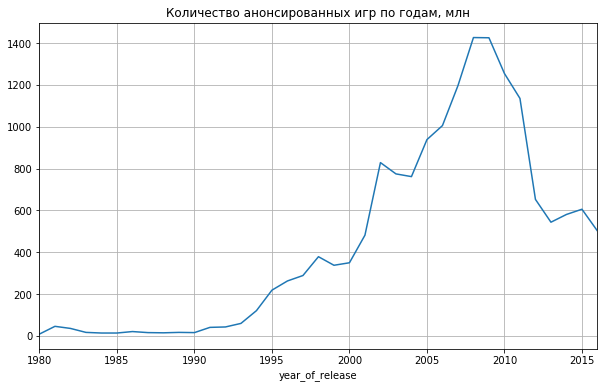

In [20]:
df.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(10,6), title = 'Количество анонсированных игр по годам, млн')

#### Из графика выше видим, что до 2002 года выпускалось очень мало игр и данный период можно назвать периодом зарождения и становления компьютерных игр.

In [21]:
# Срез df с данными начиная с 2002 года
df_high = df[df['year_of_release'] >= 2002].reset_index(drop = True)

df_high

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
...,...,...,...,...,...,...,...,...,...,...,...,...
13633,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,100500.0,100500.0,unknown,0.01
13634,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,100500.0,100500.0,unknown,0.01
13635,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,100500.0,100500.0,unknown,0.01
13636,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,100500.0,100500.0,unknown,0.01


Посмотрим лидерующие платформы по продажам на них игр.

In [22]:
# Суммарное количество игр проданное на каждой платформе
df_high.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    876.36
PS2     857.85
Wii     813.47
PS3     796.75
DS      743.72
PS4     265.79
PSP     248.77
GBA     245.58
3DS     244.54
XB      220.51
PC      175.55
GC      166.04
XOne    145.05
WiiU     76.24
PSV      47.38
PS        8.24
DC        0.35
N64       0.08
Name: total_sales, dtype: float64

#### Из сммарного количества игр проданного на каждой платформе видим, что с существенным отрывом лидируют 5 платформ: X360, PS2, Wii, PS3, DS.

Напишем функцию, которая на входе будет получать данные о продаже компьютерных игр и список лидирующих платформ, а на выходе будет строить для указанных платформ распределение продаж по годам анонсирования.

In [23]:
def sales_platform_year(data, top_platform):
    for element in top_platform:
        
        (
        data[data['platform'] == element].groupby('year_of_release')['total_sales'].sum().
        plot(grid=True, figsize=(6,4), title = 'Кол-во, продаж игр на платформе по году анонсирования игры {}, млн. шт.'.format(element))
        )
        
        plt.show()

Зададим лидирующие платформы и применим функцию sales_platform_year.

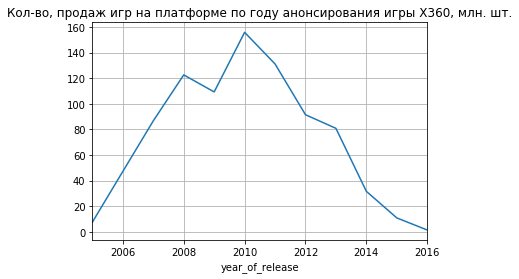

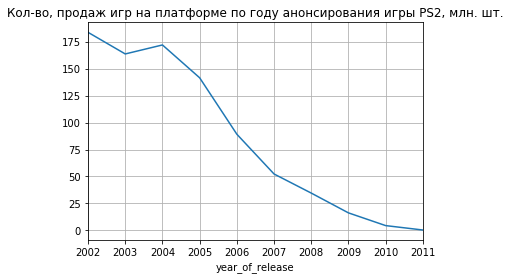

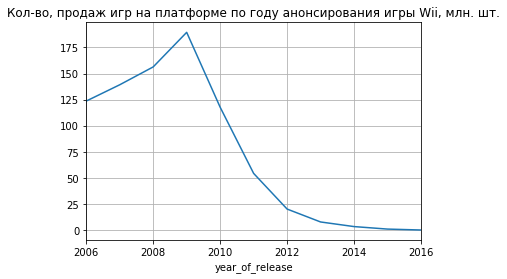

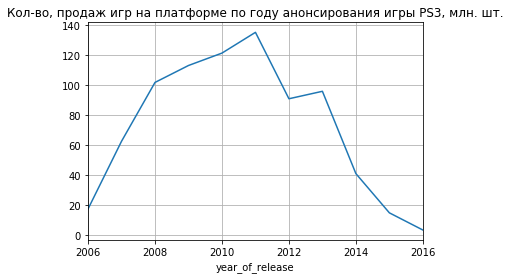

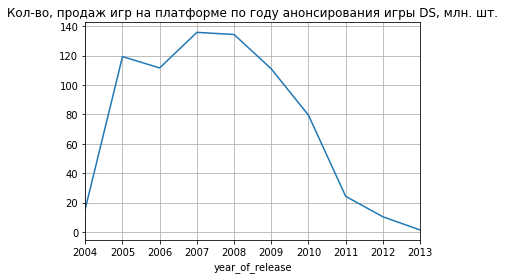

In [24]:
# Количество продаж игр на платформе по году анонсирования игры для лидирующих платформ
# Задаем лидирующие платформы
top_platform = ('X360', 'PS2', 'Wii', 'PS3', 'DS')

sales_platform_year(df_high, top_platform)

#### Из графиков распределения продаж по годам анонсирования можно сделать вывод, что время жизни платформы составляет около 7 лет, после чего платформа уже практически полностью уходит с рынка компьютерных игр. Вероятнее всего это связано с тем, что меняются компьютерные игры и вместе с ними меняются требования к платформам.

Посмотрим самые популярные платформы за последние 7 лет (время жизни платформы).

In [25]:
# Считаем продажи за последние 7 лет (с 2010 года)
df_last_7years = df[df['year_of_release'] >= 2010]
df_last_7years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    503.05
PS3     502.11
PS4     265.79
3DS     244.54
Wii     204.86
XOne    145.05
DS      115.62
PC      107.89
WiiU     76.24
PSP      59.44
PSV      47.38
PS2       4.79
Name: total_sales, dtype: float64

Построим распределение продаж по году анонсирования по самым популярным платформам за последние 7лет и посмотрим на каком этапе жизненного цикла они находятся.

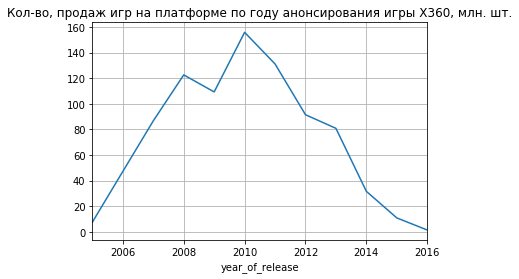

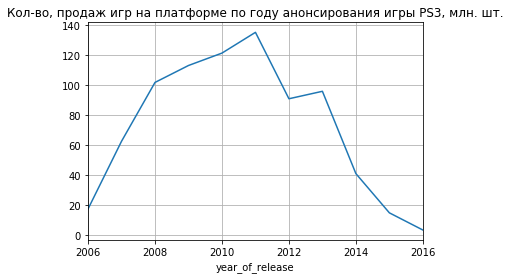

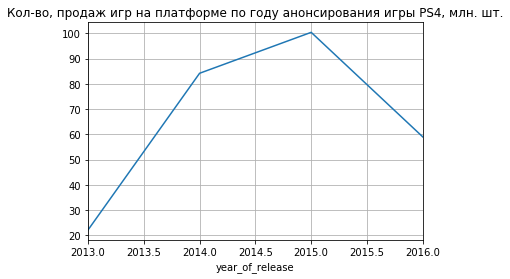

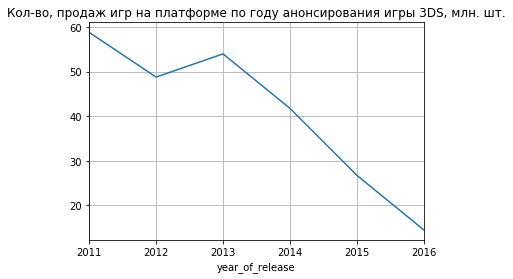

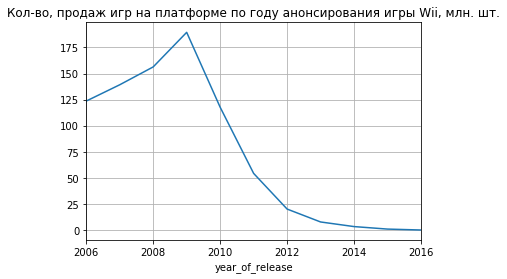

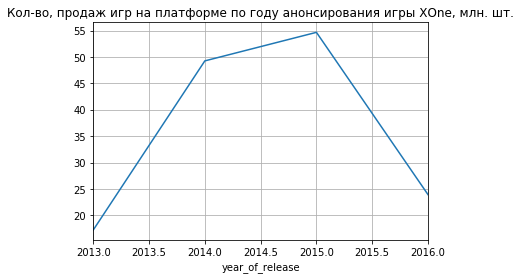

In [26]:
# Количество продаж игр на платформе по году анонсирования игры для лидирующих платформ
# Задаем лидирующие платформы
top_platform = ('X360', 'PS3', 'PS4', '3DS', 'Wii', 'XOne')

sales_platform_year(df_high, top_platform)

#### Как и следовало ожидать, лидирующие по прадажам платформы за последние 7 лет (срок жизни платформы) уже отжили свое и полностью или практически полностью ушли с рынка компьютерных игр и не представляют никакого интереса на будущие года.

Посмотрим самые популярные платформы для игр анонсированных в 2015 и 2016 году. Берем последние два года, т.к. в 2016 году может продаваться игра с высокой популярностью анонсированная в 2015 году. 

In [27]:
# Считаем продажи по платформам в 2015 и 2016 году
df[df['year_of_release'] >= 2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     159.45
XOne     78.58
3DS      41.25
WiiU     19.47
PS3      17.93
PC       12.82
X360     12.26
PSV      10.03
Wii       1.22
PSP       0.12
Name: total_sales, dtype: float64

#### Стоит отметить, что на будущий 2017 год, исходя из срока жизни платформы (7 лет), наиболее перспективными платформами останутся лидеры 2015 и 2016 года, а именно: PS4, XOne и 3DS. Также стоит отметить, что несмотря на лидирующие позиции за 2015 и 2016 год все они находятся в конце своего жизненного цикла.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по наиболее перспективным платформам: PS4, XOne и 3DS. За последние 7 лет(срок жизни платформы). 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


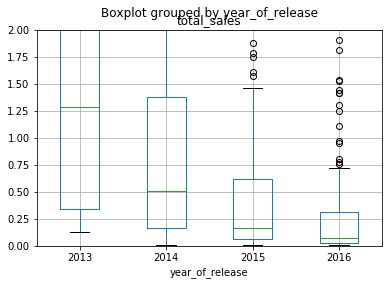

In [28]:
# Ящик с усами для платформы PS4 по глобальным продажам по наименованиям игр в разрезе года. 
df_last_7years[df_last_7years['platform'] == 'PS4'].boxplot(column='total_sales', by = 'year_of_release')

plt.ylim(0, 2)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


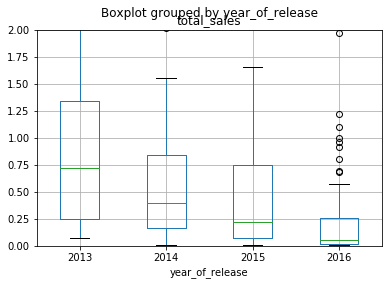

In [29]:
# Ящик с усами для платформы XOne по глобальным продажам по наименованиям игр в разрезе года. 
df_last_7years[df_last_7years['platform'] == 'XOne'].boxplot(column='total_sales', by = 'year_of_release')

plt.ylim(0, 2)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


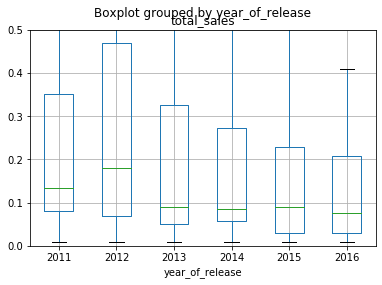

In [30]:
# Ящик с усами для платформы 3DS по глобальным продажам по наименованиям игр в разрезе года. 
df_last_7years[df_last_7years['platform'] == '3DS'].boxplot(column='total_sales', by = 'year_of_release')

plt.ylim(0, 0.5)
plt.show()

#### Стоит отметить, что наиболее перспективные на 2017 год платформы (PS4, XOne и 3DS) имели очень резкий старт продаж. Фактически эти платформы набирали максимальный объем продаж уже в первый год. Скорее всего это говорит о тесной связи между собой производителей платформ и производителей компьютерных игр. Возможно даже выход новой игры и новой платформы происходят одновременно. Кроме того, это говорит о том, что возможно в 2017 гуду выйдет новая платформа, и тогда те платформы, которые мы определили как наиболее перспективные не будут являться таковыми. 

Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [31]:
# Отбираем данные для платформы PS4
df_ps4 = df[df['platform'] == 'PS4']

df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,100500.0,100500.0,unknown,12.25
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,100500.0,100500.0,unknown,6.70
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,100500.0,100500.0,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Отзывы пользователей. Предворительно убираем те строки которые мы заполнили рейтингом 100500

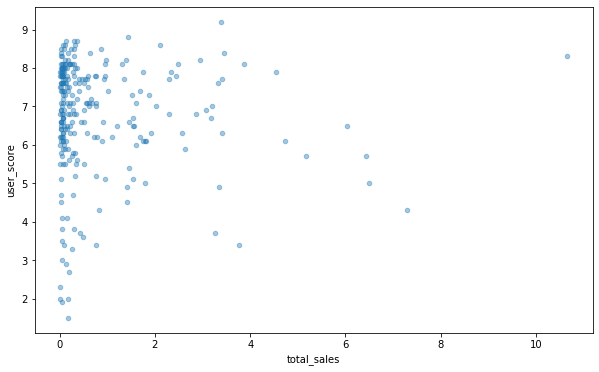

-0.12944771415841666

In [32]:
# Диаграмма рассеяния user_score от total_sales
df_ps4[df_ps4['user_score'] != 100500].plot(x='total_sales', y='user_score', kind='scatter', figsize=(10, 6), alpha=0.4)
plt.show()

# К-т корреляции между user_score и total_sales
df_ps4['total_sales'].corr(df_ps4['user_score'])

#### Из диаграммы рассеяния и корелляции -0,13 видим, что связь между оценкой пользователей и продажами компьютерной игры практически полностью отсутствует.

Отзывы критиков. Предворительно убираем те строки которые мы заполнили рейтингом 100500

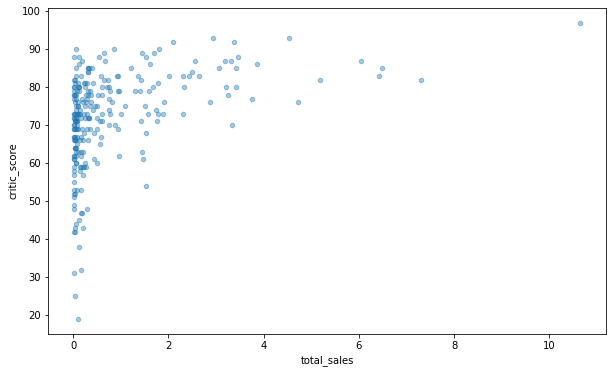

-0.14018031777625042

In [33]:
# Диаграмма рассеяния critic_score от total_sales
df_ps4[df_ps4['critic_score'] != 100500].plot(x='total_sales', y='critic_score', kind='scatter', figsize=(10, 6), alpha=0.4)
plt.show()

# К-т корреляции между critic_score и total_sales
df_ps4['total_sales'].corr(df_ps4['critic_score'])

#### Из диаграммы рассеяния и корелляции -0,14 видим, что связь между оценкой критиков и продажами компьютерной игры практически полностью отсутствует.¶

#### Стоит заметить, что отсутствие связи продаж компьютерных игр с оценкой пользователей и критиков может быть распрастранено на все платформы.

Посмотрим на общее распределение анонсированных игр по жанрам, а также продажи игр по жанрам за последние 7 лет. 

In [34]:
# Подсчет количества игр по жанрам за последние 7 лет и расчет доли игр каждого жанра
df_last_7years_genre_count = df_last_7years.groupby('genre').agg({'name':['count']})

# Переименовывание колонки
df_last_7years_genre_count.columns = ['count_games']

# Доля игр каждого жанра
df_last_7years_genre_count['share'] = df_last_7years_genre_count['count_games']/(df_last_7years_genre_count['count_games'].sum())

# Сортировка по доли
df_last_7years_genre_count.sort_values(by = 'share', ascending=False)

,count_games,share
genre,,
Action,1495,0.283305
Misc,576,0.109153
Sports,575,0.108963
Role-Playing,568,0.107637
Adventure,563,0.106689
Shooter,410,0.077696
Racing,237,0.044912
Simulation,217,0.041122
Fighting,199,0.037711


In [35]:
# Подсчет общих продаж по жанрам за последние 7 лет и расчет доли продаж каждого жанра
df_last_7years_genre_sales = df_last_7years.groupby('genre').agg({'total_sales':['sum']})

# Переименовывание колонки
df_last_7years_genre_sales.columns = ['total_sales']

# Доля одщих продаж каждого жанра
df_last_7years_genre_sales['share'] = df_last_7years_genre_sales['total_sales']/(df_last_7years_genre_sales['total_sales'].sum())

# Сортировка по доли
df_last_7years_genre_sales.sort_values(by = 'share', ascending=False)

,total_sales,share
genre,,
Action,596.47,0.261982
Shooter,422.96,0.185773
Role-Playing,291.07,0.127844
Sports,289.16,0.127005
Misc,214.18,0.094072
Platform,109.01,0.047879
Racing,107.54,0.047234
Fighting,73.28,0.032186
Simulation,66.08,0.029024


#### TOP-5 самых продающихся жанров за последние 7 лет(с 2010):
* Action - 26.2% всех продаж
* Shooter - 18.6% всех продаж
* Role-Playing - 12.8% всех продаж
* Sports - 12.7% всех продаж
* Misc - 9.4% всех продаж
#### При этом, для указанных жанров, доля общих продаж очень близка к доле количества онансированных игр.  

#### Стоит обратить внимание на жанры Adventure и Shooter:
* Adventure - в этом жанре было анонсировано 10.7% всех игр, в то время как доля продаж составила 2.4%
* Shooter - в этом жанре было анонсировано 7.8% всех игр, в то время как доля продаж составила 18.5%

Найдем самые популярные платформы (топ-5) для каждого региона (NA, EU, JP) за 2015 и 2016 год.  

In [36]:
print('TOP-5 платформ в регионе NA по продажам игр, млн.шт.')

# Считаем продажи по платформам в 2015 и 2016 году в регионе NA
df[df['year_of_release'] >= 2015].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 платформ в регионе NA по продажам игр, млн.шт.


platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64

In [37]:
print('TOP-5 платформ в регионе EU по продажам игр, млн.шт.')

# Считаем продажи по платформам в 2015 и 2016 году в регионе EU
df[df['year_of_release'] >= 2015].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 платформ в регионе EU по продажам игр, млн.шт.


platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64

In [38]:
print('TOP-5 платформ в регионе JP по продажам игр, млн.шт.')

# Считаем продажи по платформам в 2015 и 2016 году в регионе JP
df[df['year_of_release'] >= 2015].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 платформ в регионе JP по продажам игр, млн.шт.


platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64

#### Топ-5 платформ по продажам игр за 2015 и 2016 год отличаются в зависимости от региона. Так в регионе NA лидируют платформы (PS4, XOne, 3DS, WiiU, X360), в регионе EU лидируют (PS4, XOne, PC, 3DS, PS3), а в регионе JP лидируют (3DS, PS4, PSV, PS3, WiiU).

Найдем самые популярные жанры (топ-5) для каждого региона (NA, EU, JP) за 2015 и 2016 год.

In [39]:
print('TOP-5 жанров в регионе NA по продажам игр, млн.шт.')

# Считаем продажи по жанрам в 2015 и 2016 году в регионе NA
df[df['year_of_release'] >= 2015].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 жанров в регионе NA по продажам игр, млн.шт.


genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64

In [40]:
print('TOP-5 жанров в регионе EU по продажам игр, млн.шт.')

# Считаем продажи по жанрам в 2015 и 2016 году в регионе EU
df[df['year_of_release'] >= 2015].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 жанров в регионе EU по продажам игр, млн.шт.


genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

In [41]:
print('TOP-5 жанров в регионе JP по продажам игр, млн.шт.')

# Считаем продажи по жанрам в 2015 и 2016 году в регионе JP
df[df['year_of_release'] >= 2015].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

TOP-5 жанров в регионе JP по продажам игр, млн.шт.


genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64

#### Топ-5 жанров по продажам игр за 2015 и 2016 год немного отличаются в зависимости от региона. Так в регионе NA лидируют жанры (Shooter, Action, Sports, Role-Playing, Misc), в регионе EU лидируют (Shooter, Action, Sports, Role-Playing, Racing), а в регионе JP лидируют (Action, Role-Playing, Shooter, Misc, Adventure).

Посмотрим, влияет ли рейтинг ESRB на продажи игр в отдельном регионе. Для этого посмотрим ящик с усами для каждого значения рейтинга, по продажам игр в регионе за последние 7 лет.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


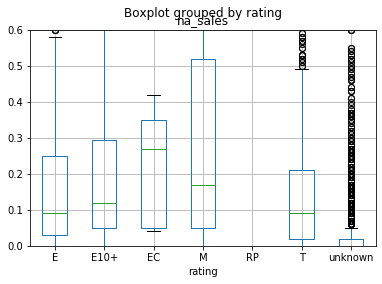

In [42]:
# Ящик с усами для рейтинга  ESRB по региону NA. 
df_last_7years.boxplot(column='na_sales', by = 'rating')

plt.ylim(0, 0.6)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


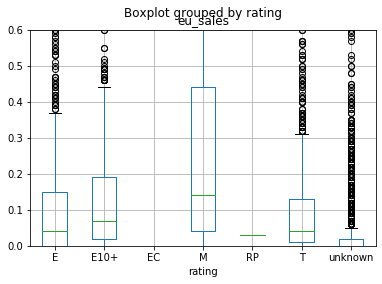

In [43]:
# Ящик с усами для рейтинга  ESRB по региону EU. 
df_last_7years.boxplot(column='eu_sales', by = 'rating')

plt.ylim(0, 0.6)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


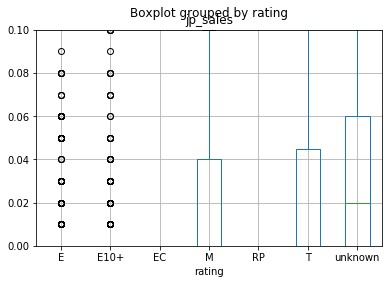

In [44]:
# Ящик с усами для рейтинга  ESRB по региону JP. 
df_last_7years.boxplot(column='jp_sales', by = 'rating')

plt.ylim(0, 0.1)
plt.show()

#### Диаграммы говорят о том, что рейтинг ESRB связан с продажами в разных регионах по-разному. Например в регионе NA игры с самым высоким медианным значением продаж имеют рейтинг EC («Early childhood»), в то время как, в регионах EU и JP игры с таким рейтингом практически не продаются. В регионе JP в основном продаются игры с рейтингом M («Mature») и T («Teen»), а игры с остальныеми рейтингами практически не продаются, что сильно отличается от ситуации в регионах NA и EU.  

In [45]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Гипотеза 1
* Нулевая гипотеза - средний пользовательский рейтинг за 2015 и 2016 годы платформ XOne и PC равны.
* Альтернативная гипотеза - средний пользовательский рейтинг за 2015 и 2016 годы платформ XOne и PC различается.

In [46]:
# Данные для оценки среднего пользовательского рейтинга платформы XOne
df_XOne_user_score = df[(df['year_of_release'] >= 2015) & (df['platform'] == 'XOne') & (df['user_score'] != 100500)]

# Данные для оценки среднего пользовательского рейтинга платформы PC
df_PC_user_score = df[(df['year_of_release'] >= 2015) & (df['platform'] == 'PC') & (df['user_score'] != 100500)]


print('Средний пользовательский рейтинг платформы XOne:',  df_XOne_user_score['user_score'].mean())

print('Средний пользовательский рейтинг платформы PC:',  df_PC_user_score['user_score'].mean())


Средний пользовательский рейтинг платформы XOne: 6.542148760330578
Средний пользовательский рейтинг платформы PC: 6.29642857142857


Проверим нулевую гипотезу.

In [47]:
# Задаем параметр альфа
alpha_platform = 0.05


# Задаем выборки
result_platform = st.ttest_ind(df_XOne_user_score['user_score'], df_PC_user_score['user_score'])

print('p-значение:', result_platform.pvalue)

if result_platform.pvalue < alpha_platform:
    print('Отвергаем нулевую гипотезу')

else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги за 2015-2016 год платформ XOne и PC (6.5 и 6.3) не имеют статистически значимого различия, поэтому не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги равны.

### Гипотеза 2
* Нулевая гипотеза - средний пользовательский рейтинг за 2015 и 2016 годы жанров Action и Sports равны.
* Альтернативная гипотеза - средний пользовательский рейтинг за 2015 и 2016 годы жанров Action и Sports различается.

In [48]:
# Данные для оценки среднего пользовательского рейтинга платформы XOne
df_Action_user_score = df[(df['year_of_release'] >= 2015) & (df['genre'] == 'Action') & (df['user_score'] != 100500)]

# Данные для оценки среднего пользовательского рейтинга платформы PC
df_Sports_user_score = df[(df['year_of_release'] >= 2015) & (df['genre'] == 'Sports') & (df['user_score'] != 100500)]


print('Средний пользовательский рейтинг платформы XOne:',  df_Action_user_score['user_score'].mean())

print('Средний пользовательский рейтинг платформы PC:',  df_Sports_user_score['user_score'].mean())

Средний пользовательский рейтинг платформы XOne: 6.808290155440415
Средний пользовательский рейтинг платформы PC: 5.198780487804878


Проверим нулевую гипотезу.

In [49]:
# Задаем параметр альфа
alpha_genre = 0.05


# Задаем выборки
result_genre = st.ttest_ind(df_Action_user_score['user_score'], df_Sports_user_score['user_score'])

print('p-значение:', result_genre.pvalue)

if result_genre.pvalue < alpha_genre:
    print('Отвергаем нулевую гипотезу')

else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


#### Средние пользовательские рейтинги за 2015-2016 год жанров Action и Sports (6.8 и 5.2) имеют статистически значимое отличие, поэтому отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги равны.

# Выводы

#### До 2002 года выпускалось очень мало игр и данный период можно назвать периодом зарождения и становления компьютерных игр.

#### Время жизни платформы составляет около 7 лет, после чего платформа уже практически полностью уходит с рынка компьютерных игр. Вероятнее всего это связано с тем, что меняются компьютерные игры и вместе с ними меняются требования к платформам.

#### На будущий 2017 год, исходя из срока жизни платформы (7 лет), наиболее перспективными платформами останутся лидеры 2015-2016 года, а именно: PS4, XOne и 3DS. Также стоит отметить, что несмотря на лидирующие позиции за 2015 и 2016 год все они находятся в конце своего жизненного цикла. Все они имели очень резкий старт продаж. Фактически эти платформы набирали максимальный объем продаж уже в первый год. Скорее всего это говорит о тесной связи между собой производителей платформ и производителей компьютерных игр. Возможно даже выход новой игры и новой платформы происходят одновременно. Вероятно в ближайший год-два нас ждет появление на рынке новых лидирующих платформ.

#### Связь между оценкой пользователей, оценкой критиков с продажами компьютерной игры практически полностью отсутствует.

#### TOP-5 самых продающихся жанров за последние 7 лет(с 2010):
* Action - 26.2% всех продаж
* Shooter - 18.6% всех продаж
* Role-Playing - 12.8% всех продаж
* Sports - 12.7% всех продаж
* Misc - 9.4% всех продаж
#### При этом, для указанных жанров, доля общих продаж очень близка к доле количества онансированных игр.  

#### Стоит обратить внимание на жанры Adventure и Shooter:
* Adventure - в этом жанре было анонсировано 10.7% всех игр, в то время как доля продаж составила 2.4%
* Shooter - в этом жанре было анонсировано 7.8% всех игр, в то время как доля продаж составила 18.5%

#### Топ-5 платформ по продажам игр за 2015-2016 год отличаются в зависимости от региона. Так в регионе NA лидируют платформы (PS4, XOne, 3DS, WiiU, X360), в регионе EU лидируют (PS4, XOne, PC, 3DS, PS3), а в регионе JP лидируют (3DS, PS4, PSV, PS3, WiiU).¶

#### Топ-5 жанров по продажам игр за 2015 -2016 год немного отличаются в зависимости от региона. Так в регионе NA лидируют жанры (Shooter, Action, Sports, Role-Playing, Misc), в регионе EU лидируют (Shooter, Action, Sports, Role-Playing, Racing), а в регионе JP лидируют (Action, Role-Playing, Shooter, Misc, Adventure).¶

#### Рейтинг ESRB связан с продажами в разных регионах по-разному. Например в регионе NA игры с самым высоким медианным значением продаж имеют рейтинг EC («Early childhood»), в то время как, в регионах EU и JP игры с таким рейтингом практически не продаются. В регионе JP в основном продаются игры с рейтингом M («Mature») и T («Teen»), а игры с остальныеми рейтингами практически не продаются, что сильно отличается от ситуации в регионах NA и EU.  

#### Средние пользовательские рейтинги за 2015-2016 год платформ XOne и PC (6.5 и 6.3) не имеют статистически значимого различия, поэтому не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги равны.

#### Средние пользовательские рейтинги за 2015-2016 год жанров Action и Sports (6.8 и 5.2) имеют статистически значимое отличие, поэтому отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги равны.